In [1]:
import os

# Masukkan Username dan API Key Anda di sini
os.environ['KAGGLE_USERNAME'] = "ahadanfauzan" # Cek di profil Kaggle Anda
os.environ['KAGGLE_KEY'] = "KGAT_78ed717ea7f0fe949ad00912fbdc3716"

print("Kredensial Kaggle telah disiapkan.")

Kredensial Kaggle telah disiapkan.


In [2]:
# Download dataset
!kaggle datasets download -d datamunge/sign-language-mnist

# Ekstraksi file zip
import zipfile
with zipfile.ZipFile("sign-language-mnist.zip", "r") as zip_ref:
    zip_ref.extractall("sign_mnist_data")

print("Dataset berhasil diunduh dan diekstrak.")

Dataset URL: https://www.kaggle.com/datasets/datamunge/sign-language-mnist
License(s): CC0-1.0
  0% 0.00/62.6M [00:00<?, ?B/s]
100% 62.6M/62.6M [00:00<00:00, 1.19GB/s]
Dataset berhasil diunduh dan diekstrak.


In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf

def load_and_preprocess(path):
    data = pd.read_csv(path)
    labels = data['label'].values
    pixels = data.drop('label', axis=1).values

    # Reshape ke 28x28 grayscale
    images = pixels.reshape(-1, 28, 28, 1)

    # Upscale ke 64x64 untuk akurasi lebih baik
    images_resized = tf.image.resize(images, [64, 64]).numpy()

    # Normalisasi piksel ke range 0-1
    return images_resized / 255.0, labels

# Load Train & Test
x_train, y_train = load_and_preprocess('sign_mnist_data/sign_mnist_train.csv')
x_test, y_test = load_and_preprocess('sign_mnist_data/sign_mnist_test.csv')

# Konversi label ke Categorical (One-Hot Encoding)
y_train = tf.keras.utils.to_categorical(y_train, 26)
y_test = tf.keras.utils.to_categorical(y_test, 26)

print(f"Bentuk data train: {x_train.shape}")

Bentuk data train: (27455, 64, 64, 1)


In [4]:
from tensorflow.keras import layers, models

def build_model():
    model = models.Sequential([
        # Layer 1: Mendeteksi pola dasar (garis/tepi)
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        # Layer 2: Mendeteksi bentuk jari
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        # Layer 3: Mendeteksi posisi tangan kompleks
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        # Klasifikasi Final
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5), # Kunci agar tidak overfitting
        layers.Dense(26, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = build_model()
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │        13,338 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,466,714 (9.41 MB)

 Trainable params: 2,466,266 (9.41 MB)

 Non-trainable params: 448 (1.75 KB)

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Augmentasi agar model tidak kaku
datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Training process
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=30, # Sesuaikan kebutuhan
    validation_data=(x_test, y_test),
    verbose=1
)

# Simpan Model ke format .keras terbaru
model.save('handspeak_model_v3-1_11.keras')

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


429/429 ━━━━━━━━━━━━━━━━━━━━ 30s 53ms/step - accuracy: 0.4921 - loss: 1.9883 - val_accuracy: 0.3274 - val_loss: 4.0830
Epoch 2/30
429/429 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.8758 - loss: 0.3774 - val_accuracy: 0.9003 - val_loss: 0.3000
Epoch 3/30
429/429 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.9373 - loss: 0.1943 - val_accuracy: 0.9838 - val_loss: 0.0453
Epoch 4/30
429/429 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.9530 - loss: 0.1440 - val_accuracy: 0.8660 - val_loss: 0.6725
Epoch 5/30
429/429 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.9635 - loss: 0.1168 - val_accuracy: 0.9555 - val_loss: 0.1328
Epoch 6/30
429/429 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.9678 - loss: 0.1064 - val_accuracy: 0.9335 - val_loss: 0.2224
Epoch 7/30
429/429 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.9704 - loss: 0.1038 - val_accuracy: 0.9742 - val_loss: 0.0817
Epoch 8/30
429/429 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.9772 - loss: 0.0812 - val_accurac

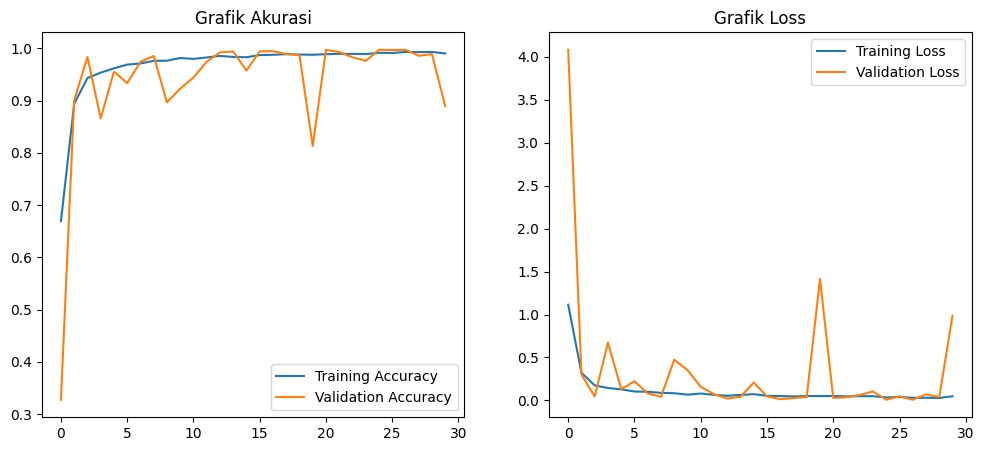

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Grafik Akurasi')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Grafik Loss')
plt.legend()
plt.show()

Saving Screenshot 2026-01-11 015509.png to Screenshot 2026-01-11 015509 (2).png
Saving Screenshot 2026-01-11 022109.png to Screenshot 2026-01-11 022109 (1).png
Saving Screenshot 2026-01-11 025202.png to Screenshot 2026-01-11 025202.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


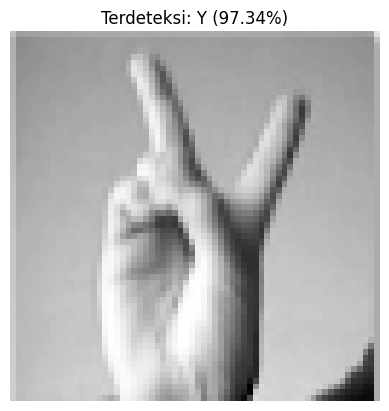

Analisis JST: Gambar Screenshot 2026-01-11 015509 (2).png diprediksi sebagai 'Y'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


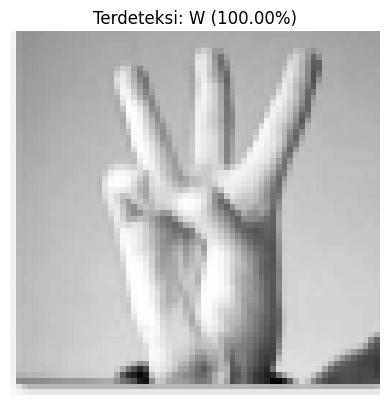

Analisis JST: Gambar Screenshot 2026-01-11 022109 (1).png diprediksi sebagai 'W'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


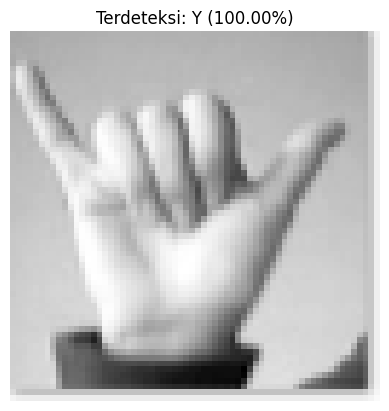

Analisis JST: Gambar Screenshot 2026-01-11 025202.png diprediksi sebagai 'Y'


In [10]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import cv2

uploaded = files.upload()

for fn in uploaded.keys():
    # Load gambar
    img_path = fn
    img_raw = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Preprocessing agar sama dengan dataset training
    img_resized = cv2.resize(img_raw, (64, 64))
    img_normalized = img_resized / 255.0
    img_input = img_normalized.reshape(1, 64, 64, 1)

    # Prediksi
    prediction = model.predict(img_input)
    class_idx = np.argmax(prediction)
    confidence = np.max(prediction) * 100

    # Mapping Alfabet (9=J, 25=Z dilewati di dataset ini)
    alphabet = list("ABCDEFGHIJKLMNOPQRSTUVWXYZ")

    # Tampilkan Hasil
    plt.imshow(img_resized, cmap='gray')
    plt.title(f"Terdeteksi: {alphabet[class_idx]} ({confidence:.2f}%)")
    plt.axis('off')
    plt.show()

    print(f"Analisis JST: Gambar {fn} diprediksi sebagai '{alphabet[class_idx]}'")